## Описание проекта

Наш клиент (продуктовая сеть) хочет прогнозировать входящий трафик на месяц вперед с детализацией по часу. Мы запросили исторические данные за полтора года и клиент их прислал. 
#### В рамках проекта необходимо:

1. сделать мини анализ данных
2. предложить вариант, как сделать прогноз количества входящих
3. выбрать метрику для оценки качества
4. спрогнозировать количество входящих посетителей на декабрь 2019 года 

#### Данные в архиве:
1. train.xlsx
2. test.xlsx


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import datetime

In [2]:
data_train = pd.read_excel('./train.xlsx', )

In [3]:
data_train.head()

,Unnamed: 0,Номер магазина,dt_h_open,Количество вошедших,weekday,day,month,year,hour,weekday_number_in_month
0,831,Алтушка,2018-03-01 08:00:00,5,3,1,3,2018,8,0
1,11830,Бутово,2018-03-01 08:00:00,63,3,1,3,2018,8,0
2,832,Алтушка,2018-03-01 09:00:00,33,3,1,3,2018,9,0
3,11831,Бутово,2018-03-01 09:00:00,55,3,1,3,2018,9,0
4,833,Алтушка,2018-03-01 10:00:00,63,3,1,3,2018,10,0


In [7]:
new_names = ['num_exp', 'name', 'date_open', 'number', 'weekday', 'day', 'month', 'year', 'hour',\
             'weekday_number_in_month'] #переименуем столбцы
new_names2 = ['num_exp', 'name', 'date_open', 'weekday', 'day', 'month', 'year', 'hour',\
             'weekday_number_in_month']
#после просмотра данных, можно заметить, что в праздники и выходные люди и правда больше ходят в магазины, 
#поэтому добавим индикаторы праздников и выходных
holidays = set([datetime.datetime(2018, 3, 8), datetime.datetime(2019, 2, 23), datetime.datetime(2018, 5, 9),\
               datetime.datetime(2019, 5, 9), datetime.datetime(2019, 3, 8), datetime.datetime(2018, 12, 29),\
               datetime.datetime(2018, 12, 30), datetime.datetime(2018, 12, 31), datetime.datetime(2019, 1, 1),\
               datetime.datetime(2019, 1, 2), datetime.datetime(2019, 12, 29), datetime.datetime(2019, 12, 30),\
               datetime.datetime(2019, 12, 31)])

data_train = pd.read_excel('./train.xlsx')
data_test = pd.read_excel('./test.xlsx')

dict_map1 = dict(zip(data_train.columns, new_names))
dict_map2 = dict(zip(data_test.columns, new_names2))

data_train.columns = data_train.columns.map(dict_map1)
data_test.columns = data_test.columns.map(dict_map2)

def data_update(data, holidays=holidays):
    p = pd.DataFrame()
    p['day'] = data.day
    p['month'] = data.month
    p['year'] = data.year
    p = pd.to_datetime(p)
    p = p.isin(holidays)*1.
    data['holiday'] = p # добавили праздники
    data['weekend'] = data.day.isin([5,6])*1. #добавили выходные
    data_alt = data[data.name == 'Алтушка'].reset_index(drop=True)
    data_but = data[data.name == 'Бутово'].reset_index(drop=True)
    return data_alt, data_but
    

In [8]:
data_train_alt, data_train_but = data_update(data_train)
data_test_alt, data_test_but = data_update(data_test)

In [21]:
data_train_alt.head()

,num_exp,name,date_open,number,weekday,day,month,year,hour,weekday_number_in_month,holiday,weekend
0,831,Алтушка,2018-03-01 08:00:00,5,3,1,3,2018,8,0,0.0,0.0
1,832,Алтушка,2018-03-01 09:00:00,33,3,1,3,2018,9,0,0.0,0.0
2,833,Алтушка,2018-03-01 10:00:00,63,3,1,3,2018,10,0,0.0,0.0
3,834,Алтушка,2018-03-01 11:00:00,65,3,1,3,2018,11,0,0.0,0.0
4,835,Алтушка,2018-03-01 12:00:00,63,3,1,3,2018,12,0,0.0,0.0


In [541]:
data_test_alt.head()

,num_exp,name,date_open,weekday,day,month,year,hour,weekday_number_in_month,holiday,weekend
0,10118,Алтушка,2019-12-01 08:00:00,6,1,12,2019,8,0,0.0,0.0
1,10119,Алтушка,2019-12-01 09:00:00,6,1,12,2019,9,0,0.0,0.0
2,10120,Алтушка,2019-12-01 10:00:00,6,1,12,2019,10,0,0.0,0.0
3,10121,Алтушка,2019-12-01 11:00:00,6,1,12,2019,11,0,0.0,0.0
4,10122,Алтушка,2019-12-01 12:00:00,6,1,12,2019,12,0,0.0,0.0


In [10]:
data_aggr = data_train_alt.groupby([data_train_alt.year, data_train_alt.month, data_train_alt.day])\
                        .mean().number.reset_index()

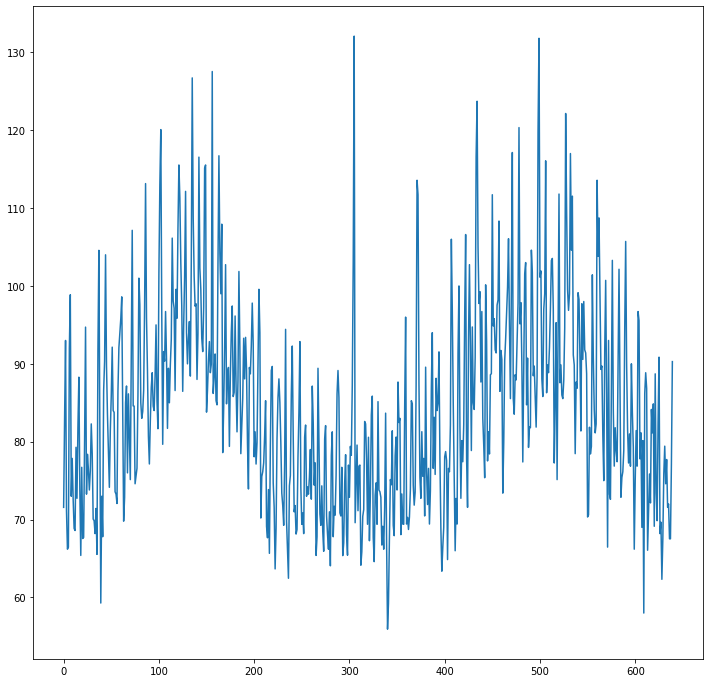

In [11]:
a = [12, 12]
plt.figure(figsize=a)
plt.plot(data_train_alt.groupby([data_train_alt.year, data_train_alt.month, data_train_alt.day])\
         .mean().number.reset_index()['number'])
plt.show()

Данный график показывает среднее количество зашедших в магазин клиентов по дням. Сложно сказать о стационарности временного ряда, так как мало сезонностей, но кажется, что он стационарен, поэтому никак не будем его менять 

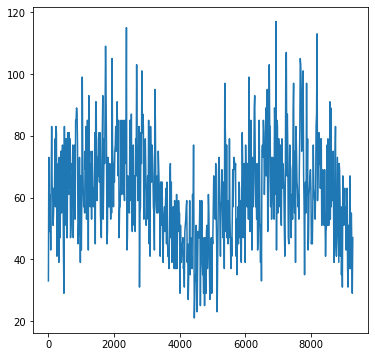

In [12]:
a = [6, 6] #График клиентов, которые заходили в 9 часов
plt.figure(figsize=a)
plt.plot(data_train_alt[data_train_alt.hour == 9]['number'])
plt.show()

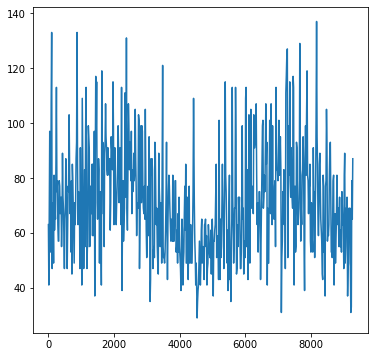

In [13]:
a = [6, 6] #10 часов
plt.figure(figsize=a)
plt.plot(data_train_alt[data_train_alt.hour == 10]['number'])
plt.show()

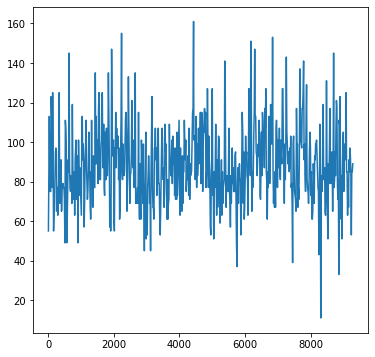

In [14]:
a = [6, 6] #15 часов
plt.figure(figsize=a)
plt.plot(data_train_alt[data_train_alt.hour == 15]['number'])
plt.show()

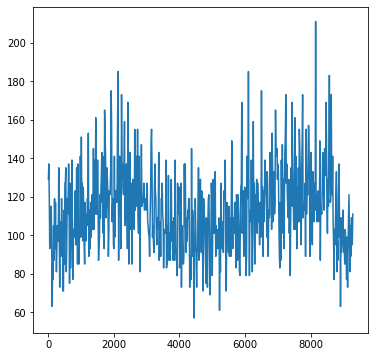

In [15]:
a = [6, 6] #18 часов
plt.figure(figsize=a)
plt.plot(data_train_alt[data_train_alt.hour == 18]['number'])
plt.show()

Рассмотрим различные алгоритмы сглаживания

In [39]:
from smooth import smooth as s

Экспоненциальное сглаживание

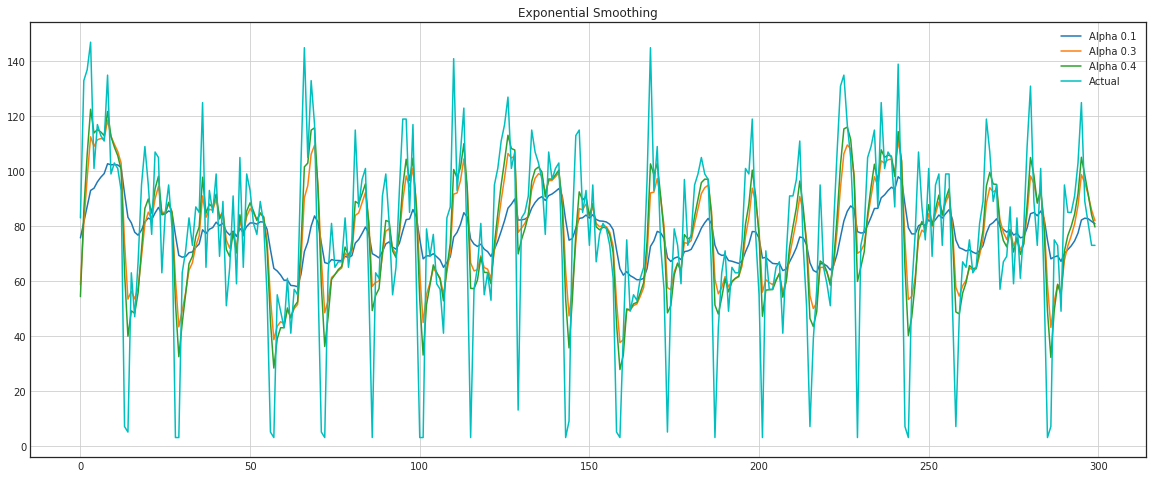

In [42]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.1, 0.3, 0.4]:
        res = s.exponential_smoothing(data_train_alt['number'], alpha)
        plt.plot(res[100:400], label="Alpha {}".format(alpha))
    plt.plot(data_train_alt['number'][100:400].values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

Решили взять $\alpha = 0.3$

In [43]:
data_train_alt['number_exp'] = s.exponential_smoothing(data_train_alt['number'], 0.3)

Двойное экспоненциальное сглаживание

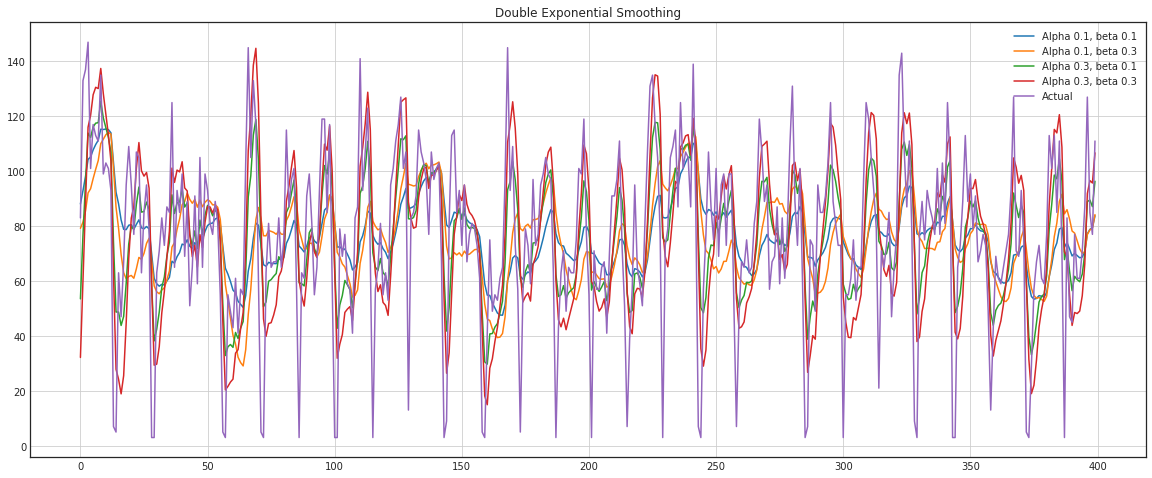

In [60]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.1, 0.3]:
        for beta in [0.1, 0.3]:
            res = s.double_exponential_smoothing(data_train_alt['number'], alpha, beta)
            plt.plot(res[100:500], label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(data_train_alt['number'][100:500].values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

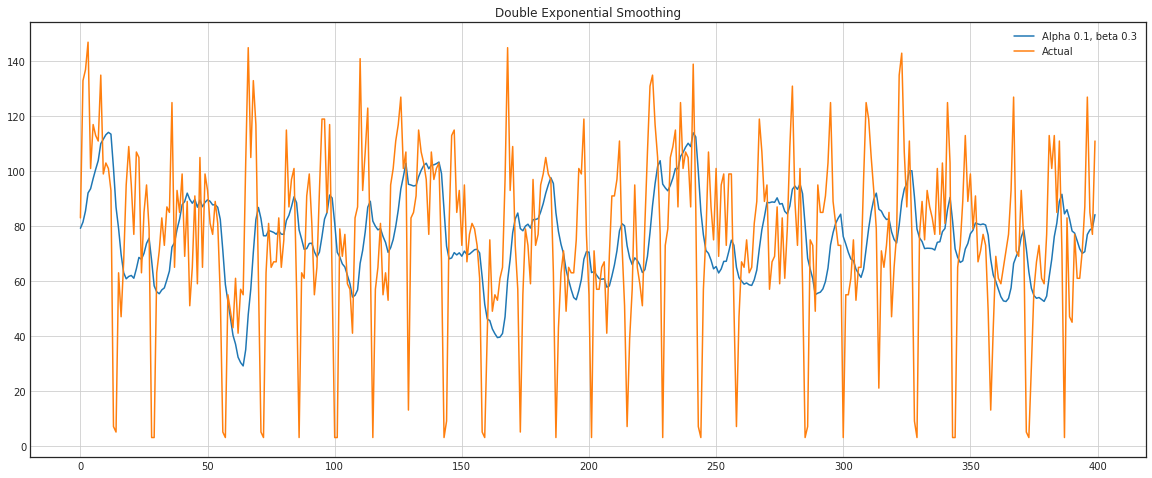

In [66]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.1]:
        for beta in [0.3]:
            res = s.double_exponential_smoothing(data_train_alt['number'], alpha, beta)
            plt.plot(res[100:500], label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(data_train_alt['number'][100:500].values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

Оптимальные параметры сглаживания $\alpha=0.1, \beta=0.3$

In [65]:
data_train_alt['number_double_exp'] = s.double_exponential_smoothing(data_train_alt['number'], 0.1, 0.3)[:-1]

Графики клиентов по часам, нет трендов роста, скорее просто сезонность

Кажется, что метрика MAE будет наилучшей, мы хотим, чтобы модель как можно меньше ошибалась в предсказании количества клиентов

Уже готовый датасет сразу нам подсказывает использовать для предсказаний модель машинного обучения, в датасете есть количество посетителей по часам, номер часа, номер дня недели, номер выходных.

Модель -- градиентный бустинг.
Данные -- каждый момент времени будет представлять из себя конкатенацию прошлых часов, признаки, соответствующие конкретным часам, дням недели, праздникам, выходным(в данном случае просто среднее), также с помощью библиотеки tsfresh создадим дополнительные признаки

In [308]:
def mean_feat(data, cat_feature, real_feature): #функция аггрегации по конкретному столбцу, 
    #так мы можем добавить признаки
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [305]:
mean_feat(data_train_alt, 'weekday', "number") #среднее число посетителей по дням

{0: 79.73444613050076,
 1: 80.33030303030303,
 2: 79.72907153729072,
 3: 81.3984962406015,
 4: 88.9659511472983,
 5: 96.68011958146488,
 6: 84.88753799392097}

In [45]:
import tsfresh

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [51]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import settings


In [52]:
settings_min = settings.MinimalFCParameters() 

In [53]:
settings_min

{'sum_values': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'maximum': None,
 'minimum': None}

In [55]:
settings_time = settings.TimeBasedFCParameters()
settings_time.update(settings_min)
settings_time

{'linear_trend_timewise': [{'attr': 'pvalue'},
  {'attr': 'rvalue'},
  {'attr': 'intercept'},
  {'attr': 'slope'},
  {'attr': 'stderr'}],
 'sum_values': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variance': None,
 'maximum': None,
 'minimum': None}

In [56]:
settings_efficient = settings.EfficientFCParameters()
settings_efficient

{'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variation_coefficient': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length': None,
 'maximum': None,
 '

In [542]:
def learning_data(data, settings, min_lag=1, max_lag=30, test_size=0.3): #делаем трейновую и тестовую выборки
    df = pd.DataFrame()
    
    for i in range(min_lag, max_lag):
        df["lag_{}".format(i)] = data.number.shift(i)
    size_test = int(len(data)*(1 - test_size)) #
    
    dict1 = mean_feat(data[:size_test], 'weekday', "number") #добавляем признаки, среднии показатели берем только 
    #для трейновых данных, поэтому [:size_test]
    df['weekday_av'] = data.weekday.map(dict1)
    
    dict2 = mean_feat(data[:size_test], 'hour', 'number')
    df['hour_av'] = data.hour.map(dict2)
    
    dict3 = mean_feat(data[:size_test], 'holiday', 'number')
    df['hol_av'] = data.holiday.map(dict3)
    
    dict4 = mean_feat(data[:size_test], 'weekend', 'number')
    df['weekend_av'] = data.weekend.map(dict4)
    
    df['number'] = data_train_alt['number']
    df = df.dropna()
    
    data_long = pd.DataFrame({0: df.iloc[:, 0:29].values.flatten(),
                          1: np.arange(df.shape[0]).repeat(df.shape[1] - 5)})
    
    X = extract_features(data_long,column_id=1, impute_function=impute, default_fc_parameters=settings)
    df = df.reset_index(drop=True).join(X)
    X_train = df[:size_test].drop(['number'], axis='columns')
    y_train = df[:size_test]['number']
    X_test = df[size_test:].drop(['number'], axis='columns')
    y_test = df[size_test:]['number']
    return X_train, y_train, X_test, y_test

In [543]:
X_train, y_train, X_test, y_test = learning_data(data_train_alt,settings)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  4.22it/s]


In [545]:
import xgboost
lr = xgboost.XGBRegressor(n_estimators=1000, max_depth=6, learning_rate=0.3, reg_alpha=2) 
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)


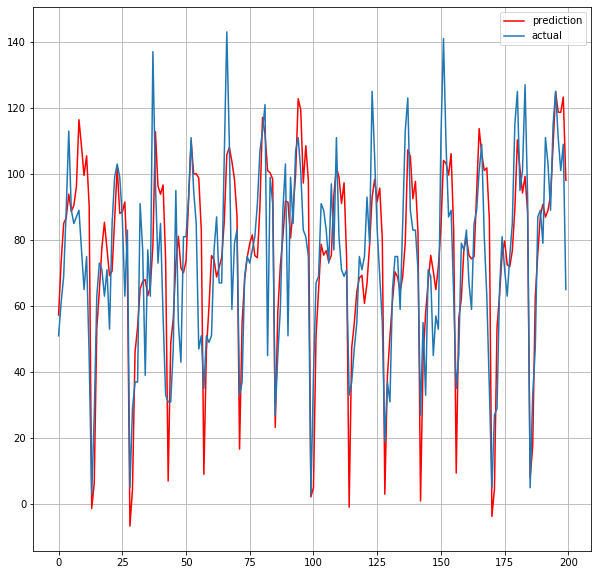

In [549]:
plt.figure(figsize=(10, 10)) #графики предсказаний и реальных значений для последних 200 часов
plt.plot(prediction[-200:], "r", label="prediction")
#plt.plot(y_test.values, label="actual")
plt.plot(y_test.values[-200:], label="actual")
plt.legend(loc="best")
plt.grid(True);

In [547]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
error1 = round(mean_absolute_error(prediction, y_test))
error2 = round(mean_squared_error(prediction, y_test))
error3 = round(r2_score(prediction, y_test))

$MAE = 16.2$

In [703]:
def make_forecast(data, test_data, min_lag=1, max_lag=30, settings=settings, model=lr):
    len_test = len(test_data)
    len_data = len(data[-40:]) #нам это нужно для того, чтобы знать лаги для неизвестных дней
    df = test_data.copy()
    df['number'] = np.zeros(len_test) #положили нулями неизвестные количества
    test_data['number'] = np.zeros(len_test)
    df = pd.concat([data[-40:], df], sort=True).reset_index(drop=True) #сконкатенировали 
    
    dict1 = mean_feat(data, 'weekday', "number") #добавляем признаки
    df['weekday_av'] = df.weekday.map(dict1)
    
    dict2 = mean_feat(data, 'hour', 'number')
    df['hour_av'] = df.hour.map(dict2)
    
    dict3 = mean_feat(data, 'holiday', 'number')
    df['hol_av'] = df.holiday.map(dict3)
    
    dict4 = mean_feat(data, 'weekend', 'number')
    df['weekend_av'] = df.weekend.map(dict4)
    
    forecasts = [] #предсказания
    
    for i in range(len_test):
        feat = []
        for j in range(min_lag, max_lag): #добавляем лаги
            feat.append(df['number'][len_data + i - j])
        data_long = pd.DataFrame({0: feat,
                          1: np.zeros(len(feat))})
        X = extract_features(data_long,column_id=1, impute_function=impute, default_fc_parameters=settings)
        feat = feat + [df['weekday_av'][len_data + i], df['hour_av'][len_data + i], \ #вектор признаков
                      df['hol_av'][len_data + i], df['weekend_av'][len_data + i]] + list(X.values[0])
        feat = np.array(feat).reshape(1, -1)
        forecast = model.predict(feat)[0]
        df['number'][len_data + i - j] = forecast
        test_data['number'][i] = forecast
        forecasts.append(forecast)
    
    return test_data
        

In [704]:
df = make_forecast(data_train_alt, test_data=data_test_alt)

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.38s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.80s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.25s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.66s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.30s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.83s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.74s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.12s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.80s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.20s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.72s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.80s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.14s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.29s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Feature Extraction: 100%|██████████████████████████████████████████

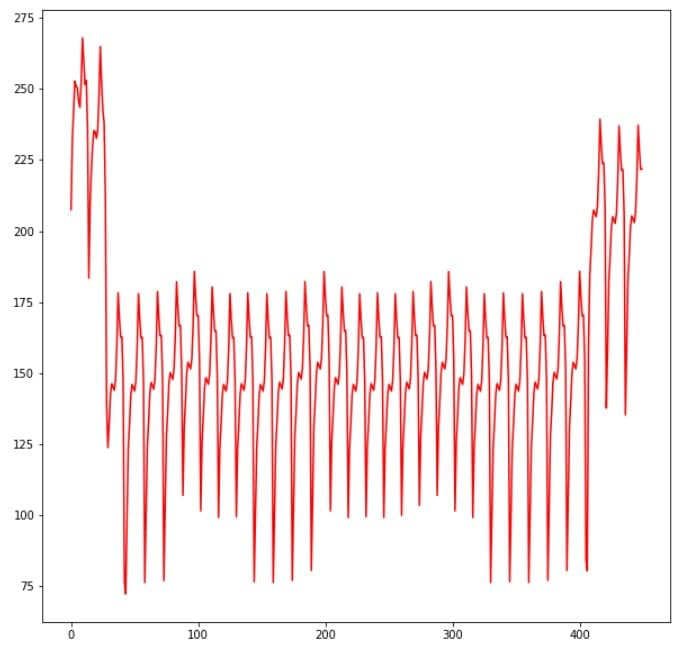

In [71]:
from PIL import Image
 
image = Image.open('res.jpg')
image

Модель правильно предсказала, что в последние дни года количество покупателей будет большим, такой же скачок наблюдается в 2018 году на известных данных